# Detection of phishing websites using ML

## 1.Introduction to Notebook

This notebook was created as a part of a workshop in computational learning ,  a course me and my partner were partaking in Afeka College of Engineering . 

The final assignment of this workshop is utilizing machine learning in a certain goal.

Me, Niv Arad , and my partner, Omri Chen Yosef, were assigned to use ML in order to detect Phishing scams, as the open source dataset found on the web is not being updated fast enough and there is a need to classify benign website and spams quickly and reliably .




## 2. Objectives

A phishing site often employs social engineering tactics by imitating legitimate URLs and web pages. This project aims to develop machine learning and deep learning models using a specially compiled dataset for identifying phishing sites. The dataset includes both malicious phishing URLs and safe website URLs, from which necessary features based on URL and website content are derived. At the end we were trying a few different models , and compared them .

## 3. Data collections

The first step in this project was to find datasets that can serve our model. 

In order to train our model we had to find to find dataset of both legitimate urls and phishing too.

The dataset of phishing url can be found from the opensource service called PhishTank.This dataset is getting updated daily. To download the data: **https://www.phishtank.com/developer_info.php**

For the legitimate URLs, we found a source that has a collection of benign and phishingURLs. The source of the dataset is Aalto University based in Finland, **https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset**. 
The following dataset has the collections mentioned above merged , so we will need to make an extra step and drop all the rows of the urls who are not benign.

** We decided not to use only the dataset obtained from the aalto universitt altough has benign and phishing urls , because it's not updated regulary as the phishtank url dataset

## 4. Collection of URL dataset

### 4.1. Phishing urls dataset

In [257]:
import pandas as pd

In [258]:
phish_data = pd.read_csv("/kaggle/input/websites-datasets/verified_online.csv")

In [259]:
phish_data.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8466295,https://wealthnetfinance-mw.com/front_assets/f...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-25T10:07:43+00:00,yes,2024-02-25T10:13:03+00:00,yes,Other
1,8466294,https://wealthnetfinance-mw.com/front_assets/f...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-25T10:07:38+00:00,yes,2024-02-25T10:13:03+00:00,yes,Other
2,8466293,https://wealthnetfinance-mw.com/front_assets/f...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-25T10:07:36+00:00,yes,2024-02-25T10:13:03+00:00,yes,Other
3,8466291,https://wealthnetfinance-mw.com/front_assets/f...,http://www.phishtank.com/phish_detail.php?phis...,2024-02-25T09:38:20+00:00,yes,2024-02-25T09:41:38+00:00,yes,Other
4,8466290,https://www.gno-aeroza.sdssqzz.top/?index=162,http://www.phishtank.com/phish_detail.php?phis...,2024-02-25T09:13:48+00:00,yes,2024-02-25T09:22:18+00:00,yes,Other


In [260]:
phish_data.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
48975,3573703,http://www.ezblox.site/free/jennifer111/helpdesk,http://www.phishtank.com/phish_detail.php?phis...,2015-11-03T14:41:38+00:00,yes,2016-03-15T18:51:08+00:00,yes,Other
48976,2042606,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-09-30T13:24:39+00:00,yes,2013-10-01T13:33:17+00:00,yes,Other
48977,1865971,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-05-28T15:59:31+00:00,yes,2013-05-28T22:13:12+00:00,yes,Other
48978,1460953,http://www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation
48979,1123978,http://creditiperhabbogratissicuro100.blogspot...,http://www.phishtank.com/phish_detail.php?phis...,2011-02-18T10:50:32+00:00,yes,2011-02-19T00:05:43+00:00,yes,Sulake Corporation


In [261]:
phish_data.shape

(48980, 8)

In [262]:
#Collecting 48980 Phishing URLs randomly
phish_url = phish_data.sample(n = 48900, random_state = 12).copy()
phish_url = phish_url.reset_index(drop=True)
phish_url.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8426246,https://w0132info.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-01-24T08:37:15+00:00,yes,2024-01-24T08:53:23+00:00,yes,Other
1,8246492,https://bafkreib6n2ro7o4fysywfon2hrao2he4u4l2x...,http://www.phishtank.com/phish_detail.php?phis...,2023-08-01T22:15:36+00:00,yes,2023-08-01T22:22:34+00:00,yes,Other
2,8435560,https://usp.usspos.top/,http://www.phishtank.com/phish_detail.php?phis...,2024-01-31T01:46:10+00:00,yes,2024-01-31T01:52:35+00:00,yes,Other
3,8406713,https://rck.lgu.mybluehost.me/sgg/auth/g9GHv2/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-29T14:49:46+00:00,yes,2023-12-29T14:53:10+00:00,yes,Other
4,8299347,https://pub-51cf6f6d1aa843d8b4dbade26f9dfe0b.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-09-15T00:53:15+00:00,yes,2023-09-15T01:09:54+00:00,yes,Other


In [263]:
phish_url.shape

(48900, 8)

### 3.2. Legitimate urls dataset


we are loading only the first column because there is a problem loading all the file

In [264]:
legit_data = pd.read_csv("/kaggle/input/websites-datasets/urlset.csv", encoding="ISO-8859-1", usecols=[0])
#extract only legitimate sites
legit_data = legit_data[48000:]

In [265]:
legit_data.head()

,domain
48000,www.crescan.com/pakistanicma/
48001,www.ficpa.org/content/home.aspx
48002,pacioli.loyola.edu/aecm/
48003,www.financialaccounting.com/financialprof.htm
48004,www.nattax.com/california.htm


In [266]:
legit_data.shape

(48007, 1)

In [267]:
#Collecting 40000 Legitimate URLs randomly
legit_data = legit_data.reset_index(drop=True)
legit_data.head()

,domain
0,www.crescan.com/pakistanicma/
1,www.ficpa.org/content/home.aspx
2,pacioli.loyola.edu/aecm/
3,www.financialaccounting.com/financialprof.htm
4,www.nattax.com/california.htm


In [268]:
legit_data.shape

(48007, 1)

## 5. Feature Extraction


### 5.1. URL-based features

These will be the features we will extract from the url , we gathered those from the artical that was presented in class, more explaination will be following for every feature

- domain of url
- IP address in URL
- length of url
- depth of url
- "http/https" in Domain
- Using URL Shortening Services “TinyURL”
- Count of prefix or sufix "-" in Domain
- Count of prefix or sufix "_" in Domain
- Sub-domain length
- "client" in string
- "admin" in string
- "login" in string
- "server" in string

In [269]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

#### 5.1.1. Domain of url

We are just extracting the domain present in the URL. This feature doesn't have much significance in the training , because we the domain name alone can't give any indication of the type of website it is.

In [270]:
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain

#### 5.1.2. Length of URL

Phishing URLs may have excessively long domains or domain strings that appear unusual or unrelated to the legitimate domain.Longer domain names indicates phishing scams.

In [271]:
def lengthURL(url):
    return len(url)

#### 5.1.3. Depth of URL

Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

The value of feature is a numerical based on the URL.

In [272]:
def depthURL(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j])!=0:
            depth = depth+1
    return depth

#### 5.1.4. "http/https" in Domain name

Checks for the presence of "http/https" in the domain part of the URL.The phishers add numerous times the "https" to the url in order to trick it's users and the make them feel like the website is legitimate as the https needs the ssl certificate which ensured the website owner identity.

In [273]:
def httpDomain(url):
    if "https" in url:
        return 1
    else:
        return 0

#### 5.1.5. URL shortening

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

If the URL is using Shortening Services, the value assigned to this feature is 1 or else 0.

In [274]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [275]:
def tinyURL(url):
    match = re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

#### 5.1.6. Preffix or Suffix "-" in Domain

Phishing websites are crafted to mislead individuals into thinking they are on official sites, often mimicking the appearance of famous brands or institutions. A frequent trick used in these malicious domains is the strategic placement of a hyphen ("-") to fool users.

This tactic involves adding a hyphen to create a domain name that closely resembles the genuine domain it aims to mimic. For instance, instead of the authentic "website.com," a phishing site might use "web-site.com" or "websi-te.com." The goal behind using the hyphen is to take advantage of users who are not paying close attention or to capitalize on typosquatting, where users accidentally enter incorrect characters or misspell a real domain name.

In [276]:
def hyphenURL(url):
    if '-' in urlparse(url).netloc:
        return 1
    else:
        return 0

#### 5.1.7. Length of Sub-domain

Phishing URLs may have excessively long subdomains or subdomain strings that appear unusual or unrelated to the legitimate domain. For example, "login.yourbank.com.phishingsite.com."

In [277]:
def subURl(url):
    p = urlparse(url).path.split('.')
    sub = 0
    for j in range(len(p)):
        if len(p[j])!=0:
            sub = sub+1
    return sub

#### Keywords in URL

Look for keywords in the URL that suggest fraudulent activities, such as "login", "client", "admin", "server", or "account." Phishing URLs often try to deceive users into believing they are accessing sensitive pages.

#### 5.1.8. search for keywords in url

In [278]:
def keyWordsURL(url):
    keywords = ["client","login","admin","server","account"]
    if any(word in url for word in keywords):
        return 1
    else:
        return 0

### 5.2. Domain-based features

- DNS record
- Age of domain
- End period of domain

In [279]:
pip install python-whois

Note: you may need to restart the kernel to use updated packages.


In [280]:

# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

#### 4.2.1. DNS record

For phishing websites, either the claimed identity is not recognized by the WHOIS database or no records founded for the hostname. If the DNS record is empty or not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [281]:
# DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

#### 4.2.2. Age of domain

This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.

If age of domain > 12 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [282]:
import whois
from datetime import datetime

def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

#### 4.2.3. End period of Domain

This feature can be extracted from WHOIS database. For this feature, the remaining domain time is calculated by finding the different between expiration time & current time. The end period considered for the legitimate domain is 6 months or less for this project.

If end period of domain > 6 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [283]:
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
    return end

### 4.3. Content-based Features

- IFrame redirection
- Webiste forwarding

#### 4.3.1. IFrame redirection

IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.

If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [284]:
import requests
import re

In [285]:
def iframe(response):
    if response == "":
        return 1
    else:
        if re.findall(r"[|]", response.text):
            return 0
        else:
            return 1

#### 4.3.2. Website forwarding

The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.

In [286]:
def forwarding(response):
    if response == "":
        return 1
    else:
        if len(response.history) <= 2:
            return 0
        else:
            return 1

## 5. URL feature extraction

Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [287]:
def featureExtraction(url, label):
    features = []

    #URL-based feature
    features.append(getDomain(url))
    features.append(lengthURL(url))
    features.append(depthURL(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(hyphenURL(url))
    features.append(subURl(url))
    features.append(keyWordsURL(url))
    
    
    
    #Domain based features
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1

    features.append(dns)
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainAge(domain_name))

    #Content-based feature

    try:
        response = requests.get(url)
    except:
        response = ""
    
    features.append(iframe(response))
    features.append(forwarding(response))
    features.append(label)

    return features
    

### 5.1. Legitimate URLs:

Feature extraction is done on legitimate URLs.

In [288]:
legit_data.head()

,domain
0,www.crescan.com/pakistanicma/
1,www.ficpa.org/content/home.aspx
2,pacioli.loyola.edu/aecm/
3,www.financialaccounting.com/financialprof.htm
4,www.nattax.com/california.htm


In [289]:
#Extracting the features & storing them in a list
legi_features = []
label = 0
sum_parsing =0
sum_domain = 0
sum_content = 0

for i in range(0, 10000):
    url = legit_data["domain"][i]
    try:
        legi_features.append(featureExtraction(url,label))
    except:
        print("there was a problem with line ",i ,"the url is: ",url)

In [290]:
#Converting the list to dataframe
feature_name = ["domain","url_len","url_dep","httpDomain","tinyURL","hyphenURL",
                "subURl","keyWordURL", "dns","domainAge","domainEnd","iframe","forwarding","label"]

legitimate = pd.DataFrame(legi_features, columns=feature_name)

In [291]:
legitimate = legitimate.drop(["domain"], axis=1)
legitimate.head()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,29,2,0,0,0,3,0,0,1,1,1,1,0
1,31,3,0,0,0,4,0,0,1,1,1,1,0
2,24,2,0,0,0,3,0,0,1,1,1,1,0
3,45,2,0,0,0,4,1,0,1,1,1,1,0
4,29,2,0,1,0,4,0,0,1,1,1,1,0


In [292]:
legitimate.tail()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
9995,34,2,0,0,0,4,0,0,1,1,1,1,0
9996,32,3,0,0,0,5,0,0,1,1,1,1,0
9997,20,2,0,0,0,3,0,0,1,1,1,1,0
9998,34,3,0,0,0,4,0,0,1,1,1,1,0
9999,61,3,0,0,0,4,0,0,1,1,1,1,0


In [293]:
legitimate.shape

(10000, 13)

In [294]:
legitimate.to_csv('/kaggle/working/legitimate.csv')

### 5.2. Phishing URLs:

exctractig the features of the phishing urls took a lot of time, and also there are a few lines in the dataset which has a problem to be computed ,so i did this on my local machine only a small portion -950 lines of the datasset because extracting features from phishing sites aren't reliable as many of them aren't found anymore and even blocked and it takes a lot of time -  it will take days for all the dataset.I am adding the file to the datasets, its called "phishing_finished"



### 5.2.1 Phishing URLs:
If you choose to use the feature extraction in that mentioned before and it worked please continue this section:

Feature extraction is done on phishing URLs.

Note : We decided that on default we will use the already computed data that is stored on the file in order to save time when running this code multiple times . If you are running the code on your local computer please check that you store the file in the right path.

In [295]:
phish_url.drop(phish_url.columns.difference(['url']), 1, inplace=True)
phish_url.head()

/tmp/ipykernel_32/3394632957.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  phish_url.drop(phish_url.columns.difference(['url']), 1, inplace=True)


,url
0,https://w0132info.weebly.com/
1,https://bafkreib6n2ro7o4fysywfon2hrao2he4u4l2x...
2,https://usp.usspos.top/
3,https://rck.lgu.mybluehost.me/sgg/auth/g9GHv2/
4,https://pub-51cf6f6d1aa843d8b4dbade26f9dfe0b.r...


exctractig the features of the phishing urls took a lot of time, and also there are a few lines in the dataset which has a problem to be computed ,so i did this on my local machine and now i am adding the file to the datasets, its called "phishing_finished"

In [296]:

# # # #Extracting the features & storing them in a list
# phish_features = []
# label = 1

# sum_parsing =0
# sum_domain = 0
# sum_content = 0
# for i in range(0, 49800):
#     url = phish_url["url"][i]
#     if i%500 ==0:
#         print(i)
#     try:
#         phish_features.append(featureExtraction(url,label))
#     except:
#         print("there was a problem with line ",i ,"the url is: ",url)

        
# #     # print(legi_features)
# print("finished extracting features from phishing URLS")

### 5.2.1 Phishing URLs:
If you choose to use the feature extraction in that mentioned before and it worked please continue this section:

Feature extraction is done on phishing URLs.

In [297]:
# #Converting the list to dataframe
# feature_name = ["domain","url_len","url_dep","httpDomain","tinyURL","hyphenURL",
#                 "subURl","keyWordURL","label"]

# phishing = pd.DataFrame(phish_features, columns=feature_name)
# phishing.head()

In [298]:
# phishing.tail()

In [299]:
# # phishing = phishing.drop(["domain"], axis=1)
# phishing.to_csv('/kaggle/working/urldata.csv')

In [300]:
# phishing.shape

### 5.2.2 Phishing URLs:
If you chose not to use the feature extraction mentioned above or it not worked and got stuck  , you will need to load the data from the file we customly made in our local machine



In [301]:
phishing = pd.read_csv("/kaggle/input/phishing-computed/final_phishing.csv")

In [302]:
phishing.head()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,29,0,1,0,0,1,0,1,1,1,0,0,1
1,88,0,1,0,0,0,0,1,1,1,0,0,1
2,23,0,1,0,0,1,0,1,1,1,1,0,1
3,46,3,1,0,0,1,0,1,1,1,1,0,1
4,66,1,1,0,1,2,0,1,1,1,1,0,1


In [303]:
phishing.tail()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
944,34,0,1,0,1,1,0,1,1,1,0,0,1
945,29,0,1,0,0,1,0,1,1,1,1,0,1
946,34,0,1,0,1,1,0,1,1,1,1,0,1
947,31,0,1,0,0,1,0,1,1,1,0,0,1
948,51,2,1,0,0,1,0,1,1,1,0,0,1


### 5.3. Final dataset

In the above section we formed two dataframes of legitimate & phishing URL features. Now, we will combine them to a single dataframe and export the data to csv file for the Machine Learning training done in other notebook

In [304]:
#Concatenating the dataframes into one 
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata = urldata.reset_index(drop=True)
urldata.head()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,29,2,0,0,0,3,0,0,1,1,1,1,0
1,31,3,0,0,0,4,0,0,1,1,1,1,0
2,24,2,0,0,0,3,0,0,1,1,1,1,0
3,45,2,0,0,0,4,1,0,1,1,1,1,0
4,29,2,0,1,0,4,0,0,1,1,1,1,0


In [305]:
urldata.tail()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
10944,34,0,1,0,1,1,0,1,1,1,0,0,1
10945,29,0,1,0,0,1,0,1,1,1,1,0,1
10946,34,0,1,0,1,1,0,1,1,1,1,0,1
10947,31,0,1,0,0,1,0,1,1,1,0,0,1
10948,51,2,1,0,0,1,0,1,1,1,0,0,1


In [306]:
urldata.to_csv('/kaggle/working/urldata.csv', index=False)

## 6. Loading final datastet

In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
urldata = pd.read_csv("/kaggle/working/urldata.csv")

In [309]:
urldata.head()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,29,2,0,0,0,3,0,0,1,1,1,1,0
1,31,3,0,0,0,4,0,0,1,1,1,1,0
2,24,2,0,0,0,3,0,0,1,1,1,1,0
3,45,2,0,0,0,4,1,0,1,1,1,1,0
4,29,2,0,1,0,4,0,0,1,1,1,1,0


In [310]:
urldata.tail()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,dns,domainAge,domainEnd,iframe,forwarding,label
10944,34,0,1,0,1,1,0,1,1,1,0,0,1
10945,29,0,1,0,0,1,0,1,1,1,1,0,1
10946,34,0,1,0,1,1,0,1,1,1,1,0,1
10947,31,0,1,0,0,1,0,1,1,1,0,0,1
10948,51,2,1,0,0,1,0,1,1,1,0,0,1


## 7. Data Preprocessing and EDA of the URL dataset

### 7.1. Shape of the dataet

In [311]:
urldata.shape

(10949, 13)

### 7.2. Dataset Columns

In [312]:
urldata.columns

Index(['url_len', 'url_dep', 'httpDomain', 'tinyURL', 'hyphenURL', 'subURl',
       'keyWordURL', 'dns', 'domainAge', 'domainEnd', 'iframe', 'forwarding',
       'label'],
      dtype='object')

### 7.3. Dataset information

In [313]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   url_len     10949 non-null  int64
 1   url_dep     10949 non-null  int64
 2   httpDomain  10949 non-null  int64
 3   tinyURL     10949 non-null  int64
 4   hyphenURL   10949 non-null  int64
 5   subURl      10949 non-null  int64
 6   keyWordURL  10949 non-null  int64
 7   dns         10949 non-null  int64
 8   domainAge   10949 non-null  int64
 9   domainEnd   10949 non-null  int64
 10  iframe      10949 non-null  int64
 11  forwarding  10949 non-null  int64
 12  label       10949 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


### 7.4. Dataset Summary

In [314]:
urldata.describe

<bound method NDFrame.describe of        url_len  url_dep  httpDomain  tinyURL  hyphenURL  subURl  keyWordURL  \
0           29        2           0        0          0       3           0   
1           31        3           0        0          0       4           0   
2           24        2           0        0          0       3           0   
3           45        2           0        0          0       4           1   
4           29        2           0        1          0       4           0   
...        ...      ...         ...      ...        ...     ...         ...   
10944       34        0           1        0          1       1           0   
10945       29        0           1        0          0       1           0   
10946       34        0           1        0          1       1           0   
10947       31        0           1        0          0       1           0   
10948       51        2           1        0          0       1           0   

       dns  domai

The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

### 7.5.Check of Null values

In [315]:
urldata.isnull().sum()

url_len       0
url_dep       0
httpDomain    0
tinyURL       0
hyphenURL     0
subURl        0
keyWordURL    0
dns           0
domainAge     0
domainEnd     0
iframe        0
forwarding    0
label         0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 1000 rows of legitimate url data & bottom 1000 of phishing url data.

In [316]:
urldata.columns

Index(['url_len', 'url_dep', 'httpDomain', 'tinyURL', 'hyphenURL', 'subURl',
       'keyWordURL', 'dns', 'domainAge', 'domainEnd', 'iframe', 'forwarding',
       'label'],
      dtype='object')

### 7.7. Max and Min of "url_len"

In [317]:
print("Maximum of url length::",urldata["url_len"].max())
print("Minimum of url length::",urldata["url_len"].min())

Maximum of url length:: 2164
Minimum of url length:: 12


### 7.8. Max and Min of "url_depth"

In [318]:
print("Maximum of url depth::",urldata["url_dep"].max())
print("Minimum of url length::",urldata["url_dep"].min())

Maximum of url depth:: 22
Minimum of url length:: 0


## 8. Data Visualization 

### 8.1. Plotting the data distribution

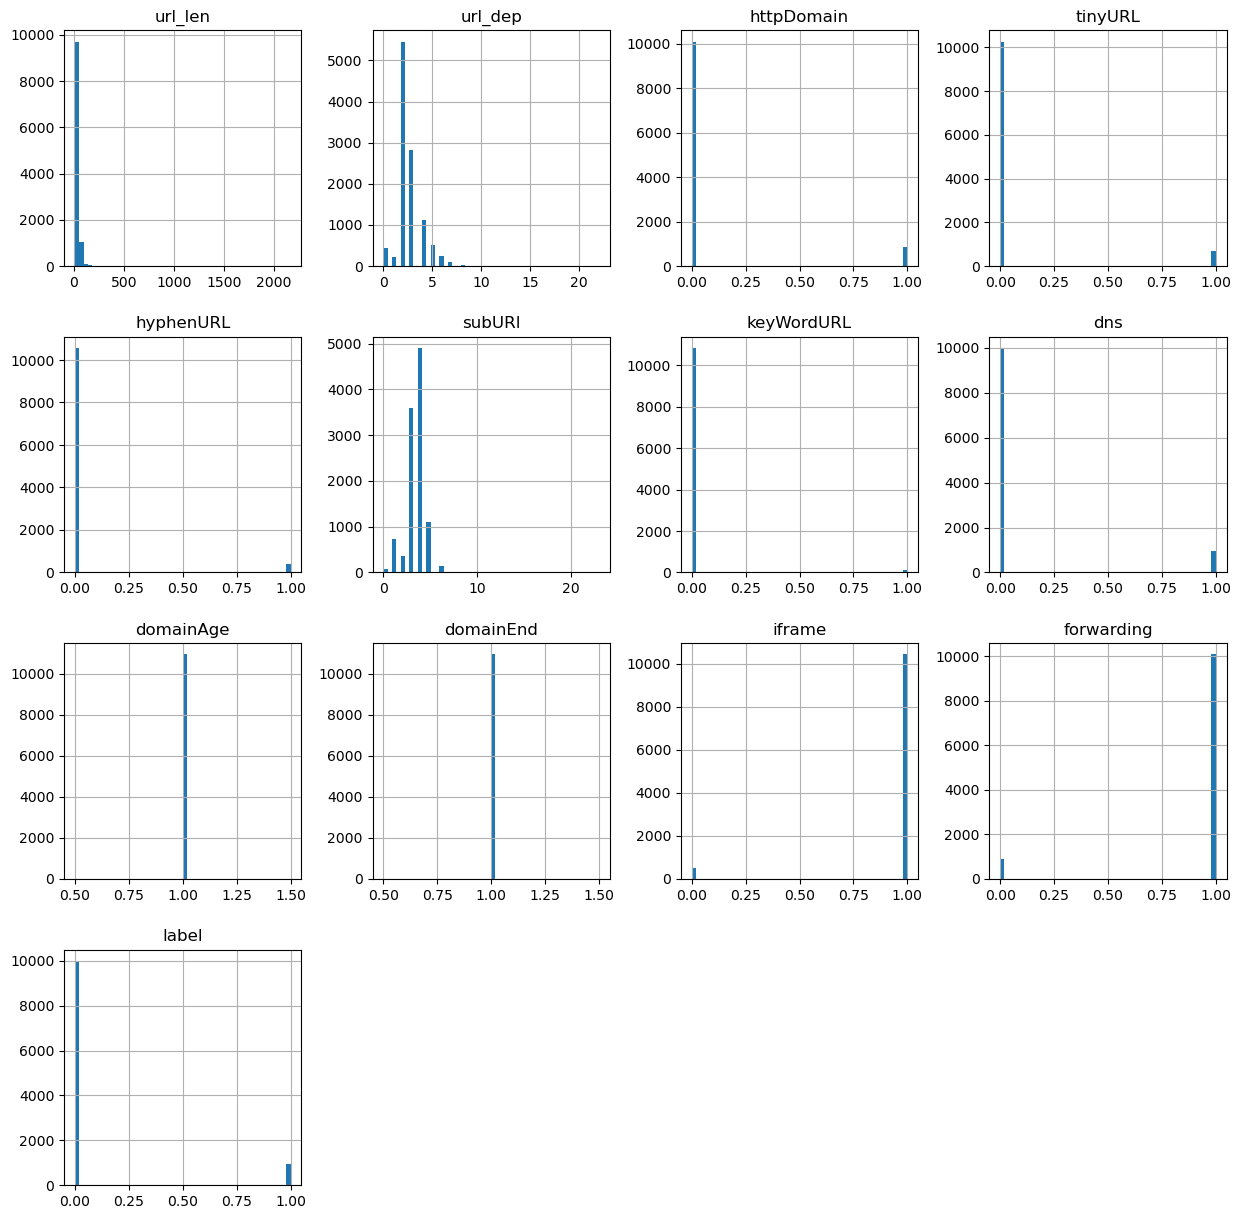

In [319]:
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

### 8.2. Correlation heatmap

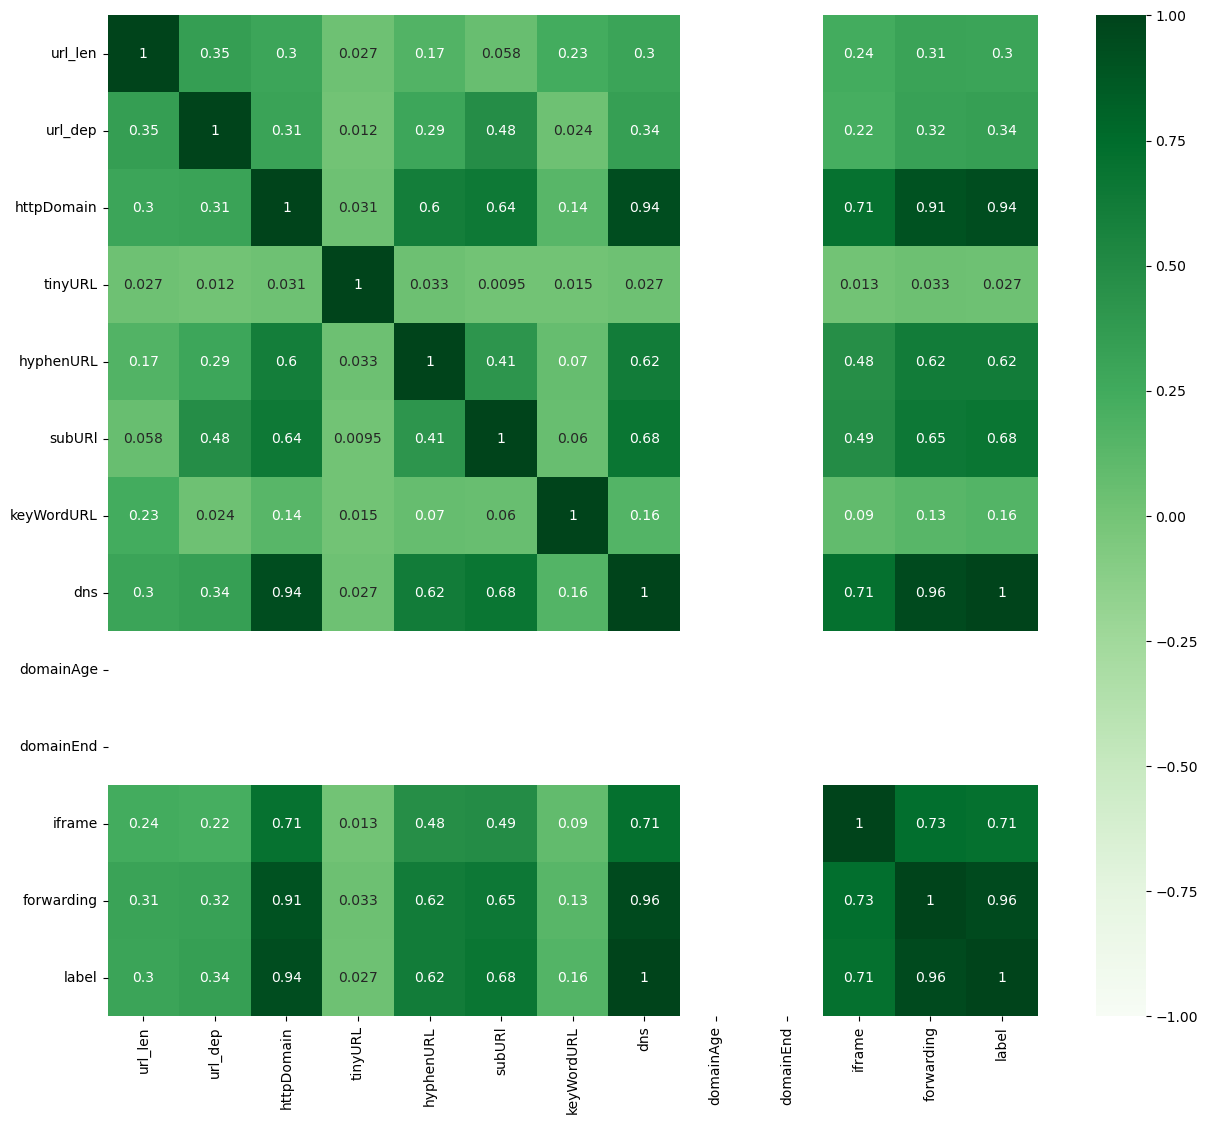

In [320]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,13))
# sns.heatmap(urldata.corr())
# plt.show()

plt.figure(figsize=(15,13))
cor = np.abs(urldata.corr())
sns.heatmap(cor, annot=True,cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

## 8.3 Regplot

## 9. Splitting the Dataset

In [321]:
y = urldata['label']
X = urldata.drop('label',axis=1)
X.shape, y.shape

((10949, 12), (10949,))

In [322]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((7664, 12), (3285, 12))

## 10. Machine Learning models and Training

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset:

- Decision Tree
- Random Forest
- XGBoost
- Logistic Regression
- Support Vectore Machines (SVM)
- Multilayer perceptrons
- Autoencoder Neural Network

In [323]:
#importing packages
from sklearn.metrics import accuracy_score

In [324]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

### 10.1. Decision Tree Classifier

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [325]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [326]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation

In [327]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


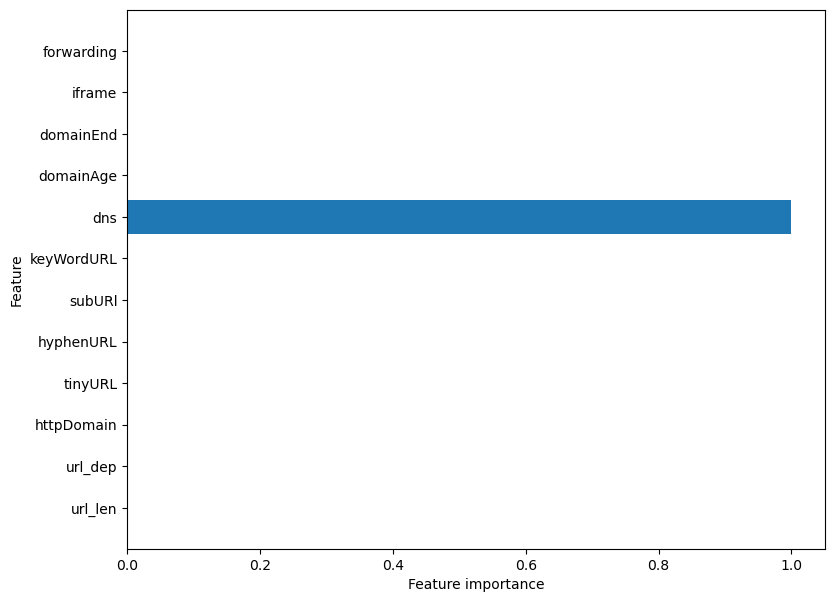

In [328]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing Results:

In [329]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### 10.2. Random Forest

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [330]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=16)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=16)

In [331]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#### Performance Evaluation

In [332]:

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000


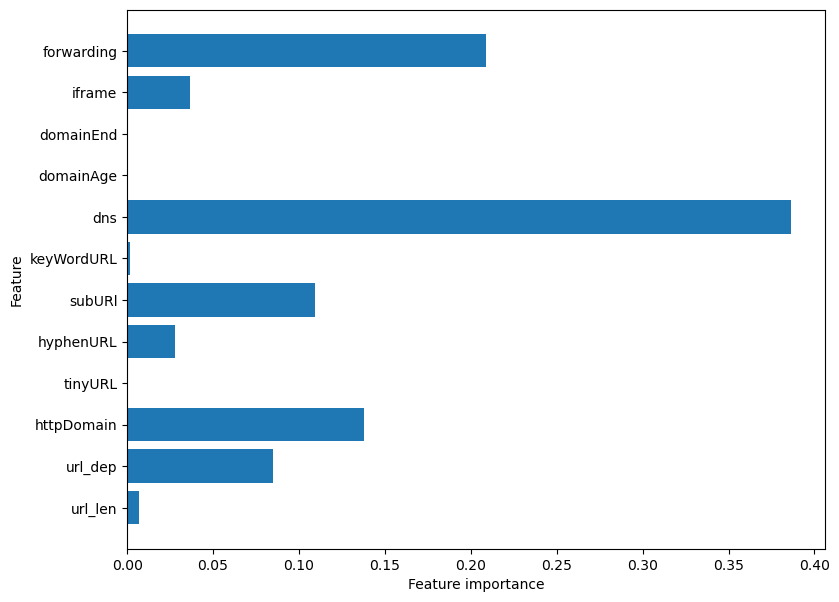

In [333]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing Results

In [334]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### 10.3. XGBoost

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [335]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [336]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

#### Performance Evaluation

In [337]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 1.000


#### Storing Results

In [338]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### 10.4. Logistic Regression

In machine learning, logistic regression is a classification algorithm used to model the relationship between input features and a binary output variable. It estimates the probability of the output belonging to a specific class using a logistic or sigmoid function.
During training, it learns optimal parameters by minimizing a cost function, such as cross-entropy loss. Once trained, it can make predictions on new data by calculating the probability of belonging to a class. Logistic regression is widely used in various domains for binary classification tasks when a linear relationship is assumed.

In [339]:
#Logistic regression machine learning

from sklearn.linear_model import LogisticRegression

#instantive the model
logistic = LogisticRegression(random_state=12, max_iter=1000)
#fit the model
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=12)

In [340]:
#predicting the target value from the model for the samples
y_test_log = logistic.predict(X_test)
y_train_log = logistic.predict(X_train)

#### Performance Evaluation

In [341]:
#computing the accuracy of the model performance
acc_train_log = accuracy_score(y_train,y_train_log)
acc_test_log = accuracy_score(y_test,y_test_log)

print("Logistic: Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic : Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic: Accuracy on training Data: 1.000
Logistic : Accuracy on test Data: 1.000


#### Storing Result

In [342]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic', acc_train_log, acc_test_log)

### 10.5. Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [343]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [344]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#### Performance Evaluation

In [345]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 1.000
SVM : Accuracy on test Data: 1.000


#### Storing Result

In [346]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### 10.6. Multilayer Perceptrons (MLPs)

Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [347]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [348]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### Performance Evaluation

In [349]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.999
Multilayer Perceptrons: Accuracy on test Data: 0.999


#### Storing Result

In [350]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## 11. Perfect Score - Dropping Features

After consulation with our mentor Amit Shtekel and explaining him we received a perfect score for our models (1.00) , he gave us new assignment , and it is to compare the price of extracting each feature. After we will drop the expensive features we will need to check the model again and to see it's results.

We decided to measure the run time of the features after we grouped them to categories , parsing , domain and dns registery, content.
After a few runtime measures we have seen that the extraction of the domain and dns registeries are much more expensive - for 1000 rows the parsing features  took 0.09 sec and the content features took 0.9 seconds , but the domain/dns features took 620 seconds(!!) , compared to the other features combined it is more than 620 times .

## 12. Dropping the domain/dns features 

## 12.1 Loading the Data

## 12.2 Dropping Features

In [351]:
def modifiedFeatureExtraction(url, label):
    features = []

    #URL-based feature
    features.append(getDomain(url))
    features.append(lengthURL(url))
    features.append(depthURL(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(hyphenURL(url))
    features.append(subURl(url))
    features.append(keyWordsURL(url))
    features.append(label)
    return features

In [352]:
import pandas as pd

phish_data = pd.read_csv("/kaggle/input/websites-datasets/verified_online.csv")
legit_data = pd.read_csv("/kaggle/input/websites-datasets/urlset.csv", encoding="ISO-8859-1", usecols=[0])
#extract only legitimate sites
legit_data = legit_data[48000:]
legit_data = legit_data.reset_index(drop=True)

In [353]:
phish_data.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
48975,3573703,http://www.ezblox.site/free/jennifer111/helpdesk,http://www.phishtank.com/phish_detail.php?phis...,2015-11-03T14:41:38+00:00,yes,2016-03-15T18:51:08+00:00,yes,Other
48976,2042606,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-09-30T13:24:39+00:00,yes,2013-10-01T13:33:17+00:00,yes,Other
48977,1865971,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,http://www.phishtank.com/phish_detail.php?phis...,2013-05-28T15:59:31+00:00,yes,2013-05-28T22:13:12+00:00,yes,Other
48978,1460953,http://www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation
48979,1123978,http://creditiperhabbogratissicuro100.blogspot...,http://www.phishtank.com/phish_detail.php?phis...,2011-02-18T10:50:32+00:00,yes,2011-02-19T00:05:43+00:00,yes,Sulake Corporation


In [354]:
legit_data.tail()

,domain
48002,xbox360.ign.com/objects/850/850402.html
48003,games.teamxbox.com/xbox-360/1860/Dead-Space/
48004,www.gamespot.com/xbox360/action/deadspace/
48005,en.wikipedia.org/wiki/Dead_Space_(video_game)
48006,www.angelfire.com/goth/devilmaycrytonite/


In [355]:
#Extracting the features & storing them in a list
legi_features = []
label = 0
sum_parsing =0
sum_domain = 0
sum_content = 0

for i in range(0, 48000):
    url = legit_data["domain"][i]
    try:
        legi_features.append(modifiedFeatureExtraction(url,label))
    except Exception as e:
        print("there was a problem with line ",i ,"the url is: ",url)
        print(e)

In [356]:
phish_features = []
label = 1

sum_parsing =0
sum_domain = 0
sum_content = 0
for i in range(0, 48980):
    url = phish_data["url"][i]
    try:
        phish_features.append(modifiedFeatureExtraction(url,label))
    except:
        print("there was a problem with line ",i ,"the url is: ",url)

        
#     # print(legi_features)
print("finished extracting features from phishing URLS")

finished extracting features from phishing URLS


In [357]:
#Converting the list to dataframe
feature_name = ["domain","url_len","url_dep","httpDomain","tinyURL","hyphenURL",
                "subURl","keyWordURL","label"]

phishing = pd.DataFrame(phish_features, columns=feature_name)
phishing.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
0,wealthnetfinance-mw.com,67,4,1,0,1,1,0,1
1,wealthnetfinance-mw.com,77,5,1,0,1,2,1,1
2,wealthnetfinance-mw.com,68,4,1,0,1,1,0,1
3,wealthnetfinance-mw.com,76,5,1,0,1,2,0,1
4,gno-aeroza.sdssqzz.top,45,0,1,0,1,1,0,1


In [358]:
phishing.tail()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
48975,ezblox.site,48,3,0,0,0,1,0,1
48976,formbuddy.com,62,2,0,0,0,2,0,1
48977,formbuddy.com,76,2,0,0,0,2,0,1
48978,habbocreditosparati.blogspot.com,44,0,0,1,0,1,0,1
48979,creditiperhabbogratissicuro100.blogspot.com,95,3,0,1,0,2,0,1


In [359]:
legit = pd.DataFrame(legi_features, columns=feature_name)
legit.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
0,,29,2,0,0,0,3,0,0
1,,31,3,0,0,0,4,0,0
2,,24,2,0,0,0,3,0,0
3,,45,2,0,0,0,4,1,0
4,,29,2,0,1,0,4,0,0


In [360]:
legit.tail()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
47995,,39,4,0,0,0,4,0,0
47996,,55,4,0,1,0,3,0,0
47997,,39,3,0,0,0,3,0,0
47998,,38,4,0,0,0,4,0,0
47999,,36,3,0,0,0,3,0,0


In [361]:
urldata = pd.concat([legit, phishing]).reset_index(drop=True)
urldata = urldata.reset_index(drop=True).drop(["domain"], axis=1)
urldata.head()

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
0,29,2,0,0,0,3,0,0
1,31,3,0,0,0,4,0,0
2,24,2,0,0,0,3,0,0
3,45,2,0,0,0,4,1,0
4,29,2,0,1,0,4,0,0


In [362]:
urldata.tail()


,url_len,url_dep,httpDomain,tinyURL,hyphenURL,subURl,keyWordURL,label
96975,48,3,0,0,0,1,0,1
96976,62,2,0,0,0,2,0,1
96977,76,2,0,0,0,2,0,1
96978,44,0,0,1,0,1,0,1
96979,95,3,0,1,0,2,0,1


## 13.Training Models

## 13.1 Splitting the Data

In [363]:
y = urldata['label']
X = urldata.drop('label',axis=1)
X.shape, y.shape

((96980, 7), (96980,))

In [364]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((67886, 7), (29094, 7))

## Random Forest

In [365]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [366]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [367]:

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.994
Random forest: Accuracy on test Data: 0.994


## Logistic Regression

In [368]:
#Logistic regression machine learning

from sklearn.linear_model import LogisticRegression

#instantive the model
logistic = LogisticRegression(random_state=42, max_iter=1000)
#fit the model
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [369]:
#predicting the target value from the model for the samples
y_test_ogisticl = logistic.predict(X_test)
y_train_logistic = logistic.predict(X_train)

In [370]:

#computing the accuracy of the model performance
acc_train_logistic = accuracy_score(y_train,y_train_logistic)
acc_test_logistic = accuracy_score(y_test,y_test_ogisticl)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logistic))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logistic))

Logistic Regression: Accuracy on training Data: 0.994
Logistic Regression: Accuracy on test Data: 0.994
